In [ ]:
import pandas as pd
from fep import FEP, load_features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def decision_tree_for_feature_importances(df):
    X = df.drop(columns=['outcome'])  
    y = df['outcome']                


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)


    importances = dt_model.feature_importances_
    feature_names = X.columns


    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances, color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance in Decision Tree")
    plt.show()


    y_pred = dt_model.predict(X_test)


    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt_model.classes_)
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    print(classification_report(y_test,y_pred))
    y_proba = dt_model.predict_proba(X_test)[:, 1]

    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc_score)


In [101]:
def random_forest(df):
    X = df.drop(columns=['outcome'])  
    y = df['outcome']                


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    dt_model = RandomForestClassifier(n_estimators=5)
    dt_model.fit(X_train, y_train)


    importances = dt_model.feature_importances_
    feature_names = X.columns


    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances, color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance in Decision Tree")
    plt.show()


    y_pred = dt_model.predict(X_test)


    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt_model.classes_)
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    print(classification_report(y_test,y_pred))
    y_proba = dt_model.predict_proba(X_test)[:, 1]

    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc_score)


In [3]:
def correlation_matrix(df):
    corr_matrix = df.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar=True)

    plt.title("Correlation matrix")
    plt.show()

In [4]:
bids = pd.read_csv('../Data/facebook/bids.csv')
bidder = pd.read_csv('../Data/facebook/train.csv')

In [5]:
bids['country'].fillna(bids['country'].mode()[0], inplace = True)   # fill contry with the mode.

In [6]:
unique_bidders = pd.concat([bids['bidder_id'], bidder['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
bids['encoded_bidder_id'] = bids['bidder_id'].map(bidder_mapping)
bidder['encoded_bidder_id'] = bidder['bidder_id'].map(bidder_mapping)
bids.drop('bidder_id', axis=1, inplace=True)
bidder.drop('bidder_id', axis=1, inplace=True)

In [7]:
bidder.drop(['payment_account', 'address'], axis=1, inplace=True)

In [8]:
count_for_bidder = bids.groupby("encoded_bidder_id").nunique()
df_train_bidder = pd.merge(bidder, count_for_bidder, on='encoded_bidder_id', how='left') # drop the right 
df_train_bidder = df_train_bidder.rename(columns = {'bid_id': 'N_bids', 'auction': 'N_auctions', 'merchandise': 'N_merchandise', 'device': 'N_device', 'time': 'N_time', 'country': 'N_country', 'ip': 'N_ip', 'url': 'N_url'})

In [9]:
df_train_bidder['bids/url'] = df_train_bidder['N_bids'] / df_train_bidder['N_url']
df_train_bidder['bids/ip'] = df_train_bidder['N_bids'] / df_train_bidder['N_ip']
df_train_bidder['bids/auctions'] = df_train_bidder['N_bids'] / df_train_bidder['N_auctions']
df_train_bidder['bids/country'] = df_train_bidder['N_bids'] / df_train_bidder['N_country']
df_train_bidder['bids/time'] = df_train_bidder['N_bids'] / df_train_bidder['N_time']
df_train_bidder['bids/device'] = df_train_bidder['N_bids'] / df_train_bidder['N_device']
df_train_bidder['ip/country'] = df_train_bidder['N_ip'] / df_train_bidder['N_country']
df_train_bidder = df_train_bidder.fillna(0) # fill NaN with 0 for bidders that never placed a bid

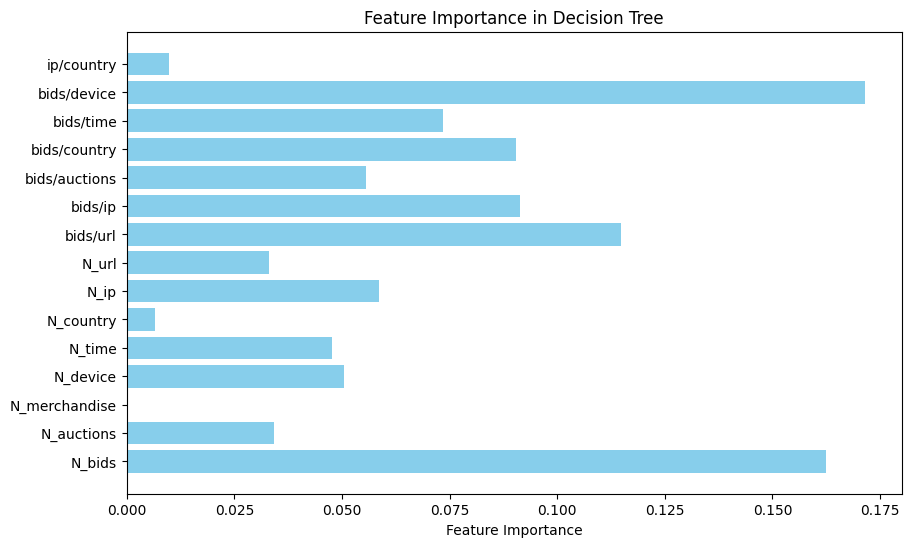

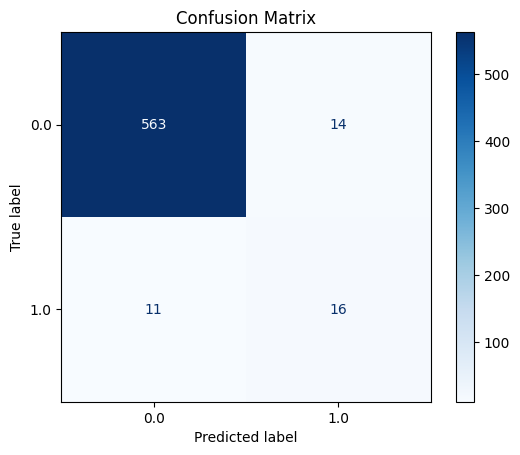

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       577
         1.0       0.53      0.59      0.56        27

    accuracy                           0.96       604
   macro avg       0.76      0.78      0.77       604
weighted avg       0.96      0.96      0.96       604

ROC AUC Score: 0.7683419988445985


In [ ]:
df = df_train_bidder.drop(['encoded_bidder_id'], axis=1, inplace=False)
random_forest(df)

In [ ]:
#df_train_bidder.drop(['N_url','N_ip','N_country','N_time','N_device','N_merchandise','N_auctions'], axis=1, inplace=True)

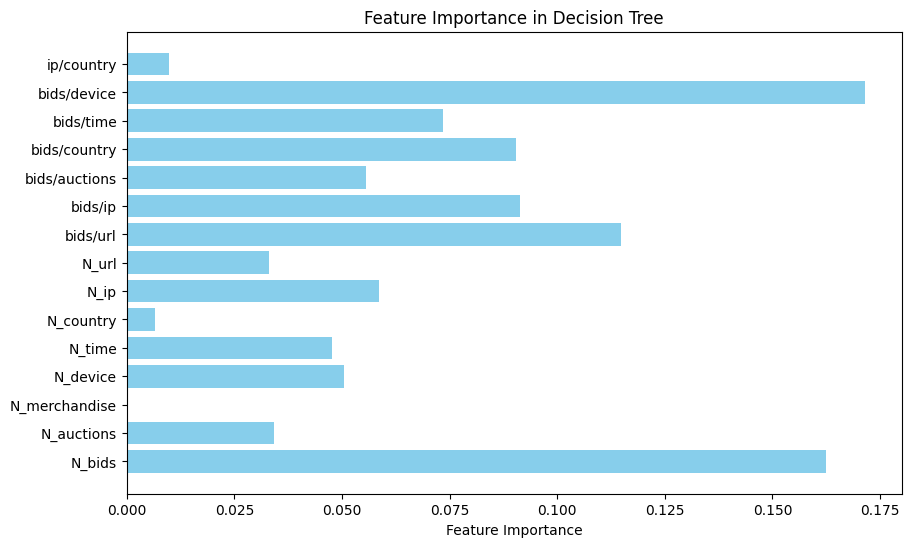

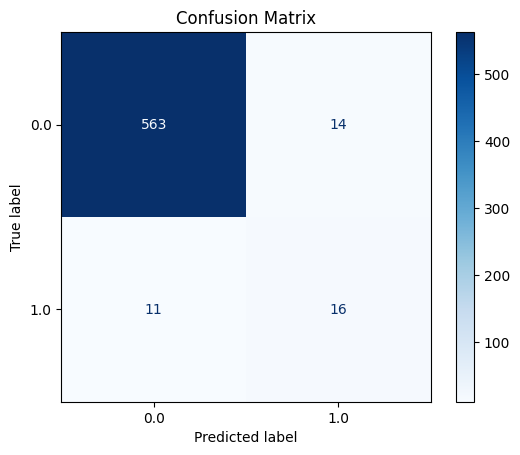

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       577
         1.0       0.53      0.59      0.56        27

    accuracy                           0.96       604
   macro avg       0.76      0.78      0.77       604
weighted avg       0.96      0.96      0.96       604

ROC AUC Score: 0.7683419988445985


In [ ]:
df = df_train_bidder.drop(['encoded_bidder_id'], axis=1, inplace=False)
random_forest(df)

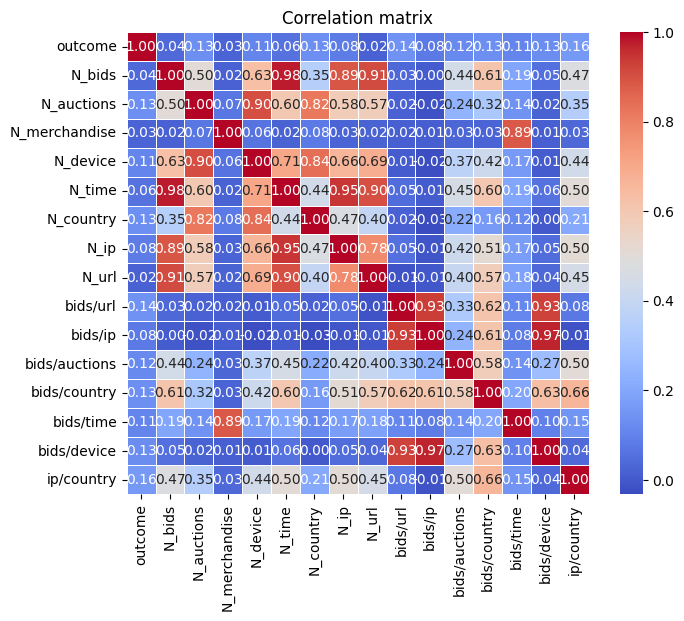

In [13]:
correlation_matrix(df)

In [ ]:
#df_train_bidder.drop(['bids/url','bids/ip', 'bids/country'], axis=1, inplace=True)

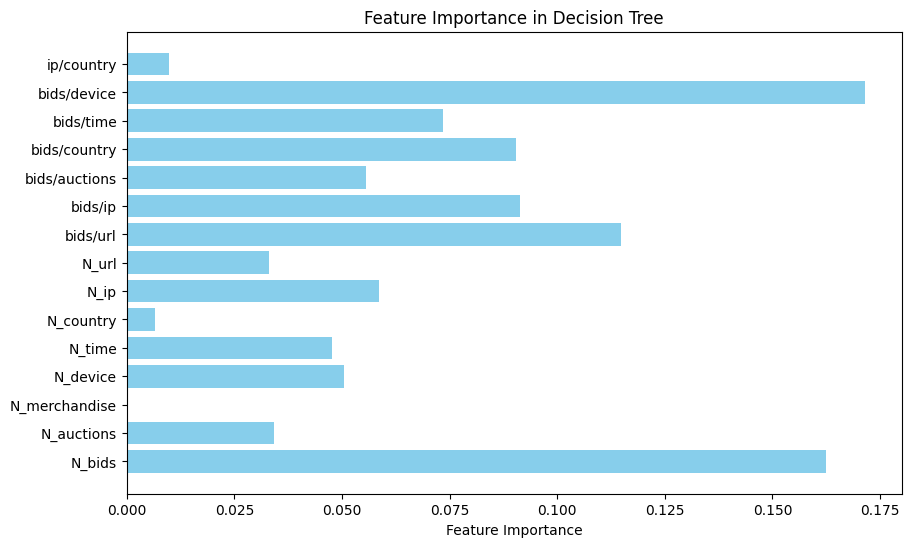

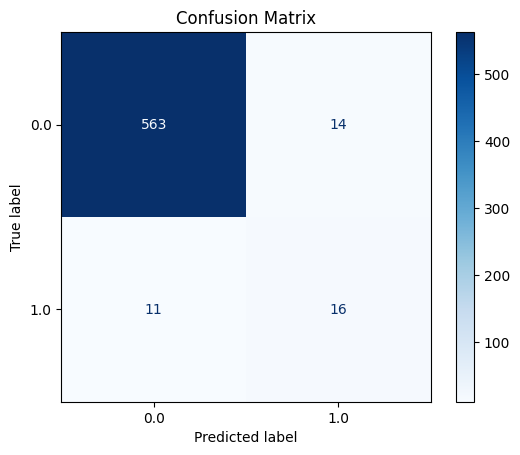

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       577
         1.0       0.53      0.59      0.56        27

    accuracy                           0.96       604
   macro avg       0.76      0.78      0.77       604
weighted avg       0.96      0.96      0.96       604

ROC AUC Score: 0.7683419988445985


In [ ]:
df = df_train_bidder.drop(['encoded_bidder_id'], axis=1, inplace=False)
decision_tree_for_feature_importances(df)

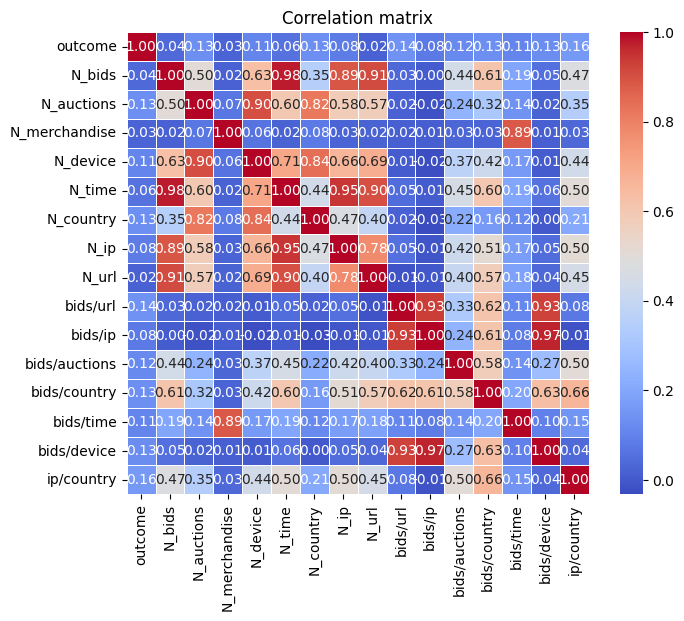

In [16]:
correlation_matrix(df)

Lo score è leggermente diminuito, ma ora abbiamo features meno correlate tra loro. Ora dobbiamo trovare altre features potenzialmente utili. 

## Capitolo 2

Difference of time between consecutive bids of the same bidder

In [17]:
df_time = bids.drop(['bid_id', 'country', 'merchandise', 'device', 'url', 'ip', 'auction'],axis=1, inplace=False)
temp = df_time.copy()
df_time['difference'] = temp.groupby('encoded_bidder_id').diff() 
# we can drop NaN that are the first bid of each bidder
df_time.dropna(inplace = True)

In [18]:
count_concurrent_bids = df_time[df_time['difference']==0].groupby('encoded_bidder_id').count().drop('time', axis=1)
count_concurrent_bids.rename(columns = {'difference': 'count_concurrent_bids'}, inplace=True)
df_train_bidder = pd.merge(df_train_bidder, count_concurrent_bids, on='encoded_bidder_id', how='left').fillna(0)

In [19]:
temp = df_time.groupby('encoded_bidder_id')['difference'].describe()
temp.drop(['count'], axis=1, inplace=True)
temp.rename(columns = {'mean': 'mean_difference', 'std': 'std_difference', 'min': 'min_difference', 'max':'max_difference', '50%':'median_difference', '25%':'25_difference', '75%':'75_difference'}, inplace=True)
df_train_bidder = pd.merge(df_train_bidder, temp, on='encoded_bidder_id', how='left').fillna(0)

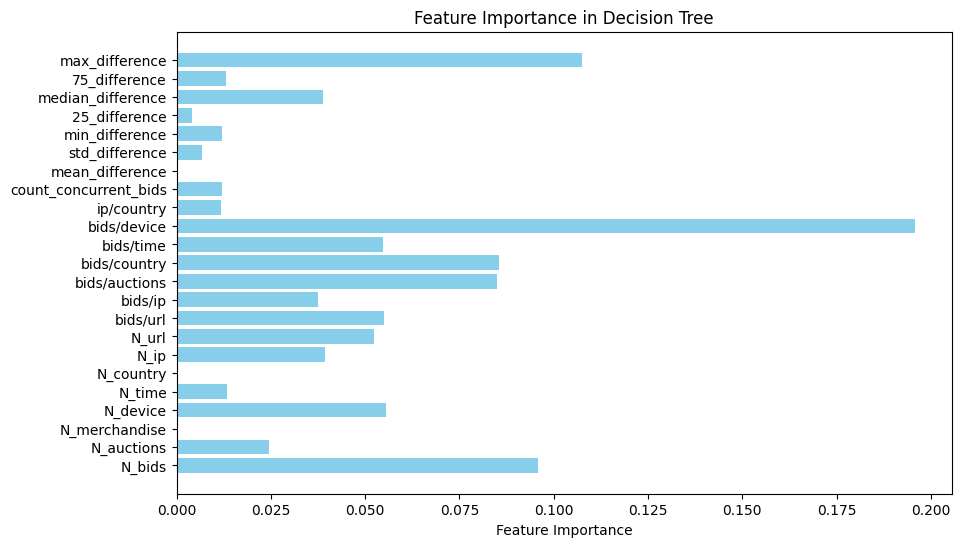

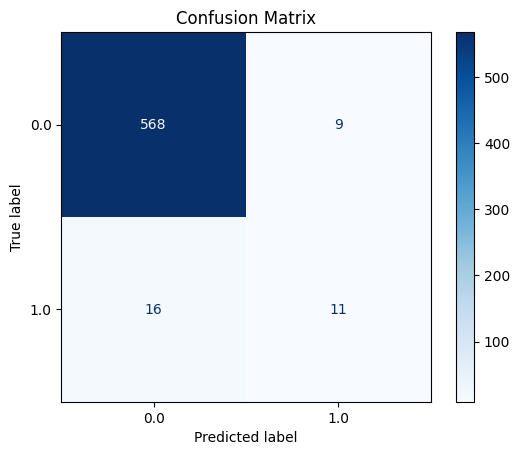

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       577
         1.0       0.55      0.41      0.47        27

    accuracy                           0.96       604
   macro avg       0.76      0.70      0.72       604
weighted avg       0.95      0.96      0.96       604

ROC AUC Score: 0.664837280955132


In [20]:
df = df_train_bidder.drop(['encoded_bidder_id'], axis=1, inplace=False)
decision_tree_for_feature_importances(df)

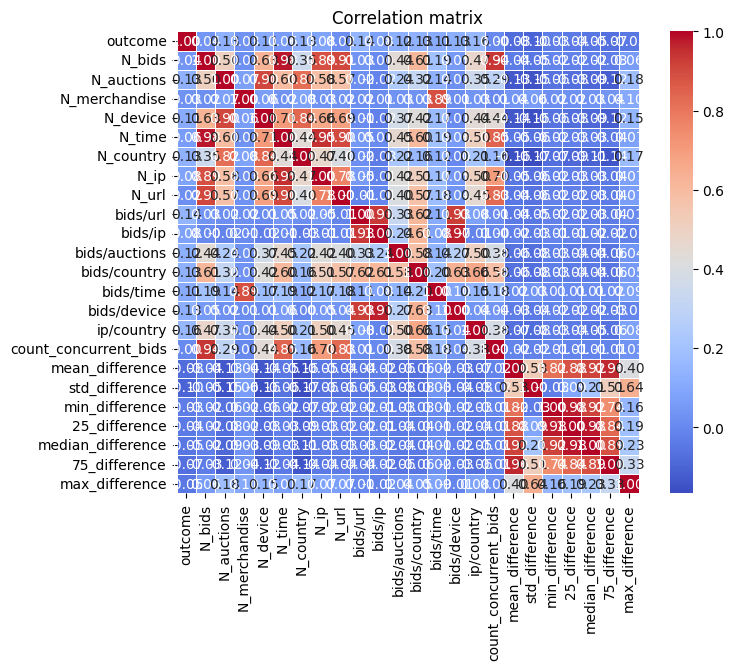

In [21]:
correlation_matrix(df)

Drop some useless features and high-correlated ones

In [22]:
#df_train_bidder.drop(['min_difference','25_difference','75_difference'], axis=1, inplace=True)

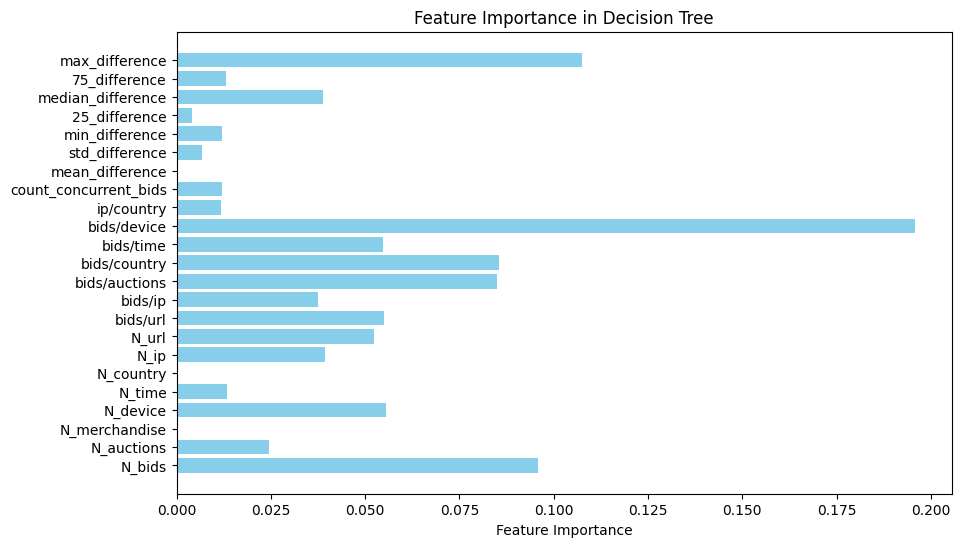

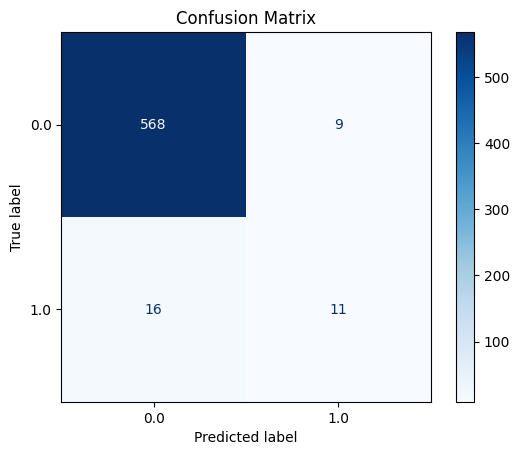

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       577
         1.0       0.55      0.41      0.47        27

    accuracy                           0.96       604
   macro avg       0.76      0.70      0.72       604
weighted avg       0.95      0.96      0.96       604

ROC AUC Score: 0.664837280955132


In [23]:
df = df_train_bidder.drop(['encoded_bidder_id'], axis=1, inplace=False)
decision_tree_for_feature_importances(df)

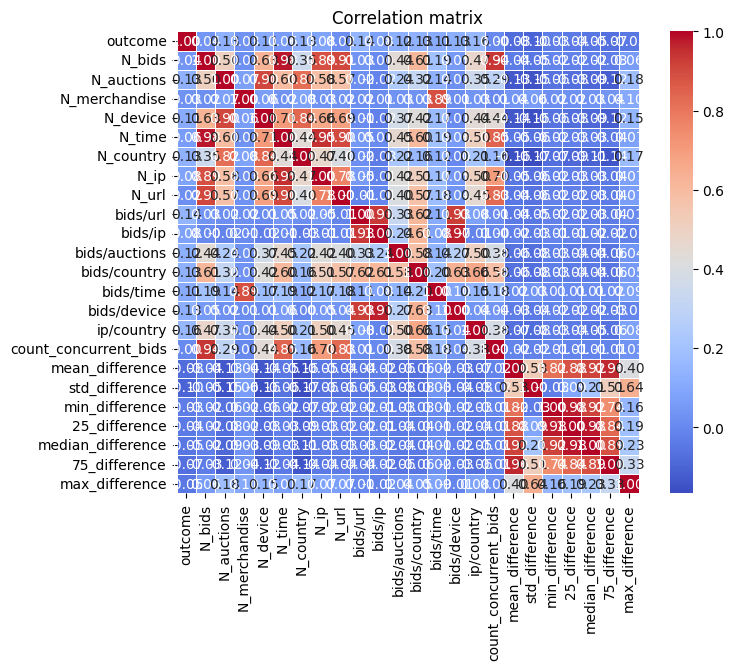

In [24]:
correlation_matrix(df)

Count Number of wins

In [25]:
temp_df = bids.sort_values(['auction', 'time'])
winner_bids = temp_df.groupby('auction').max('time')
count_win = winner_bids.groupby('encoded_bidder_id').count().drop('time',axis=1, inplace=False).rename(columns = {'bid_id': 'N_win'})
df_train_bidder = pd.merge(df_train_bidder, count_win, on='encoded_bidder_id', how='left').fillna(0)


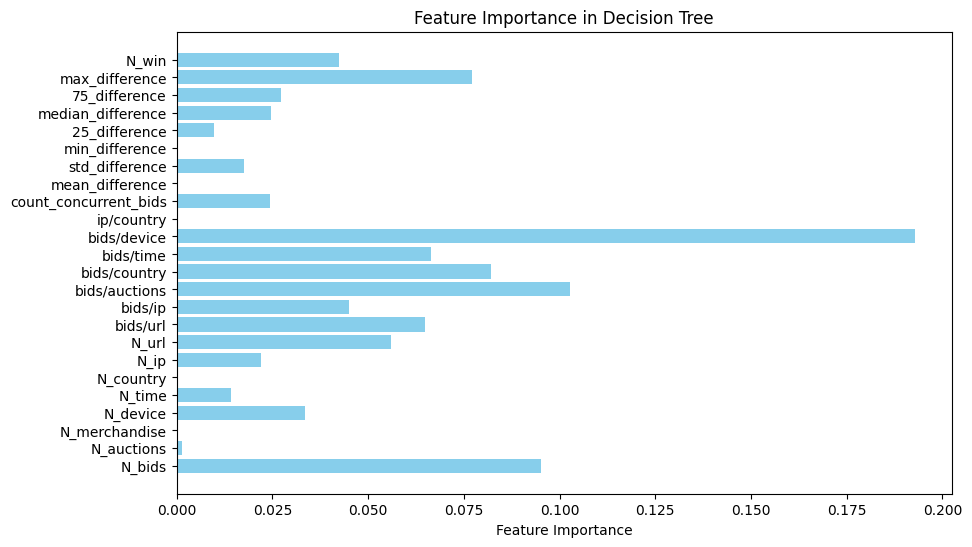

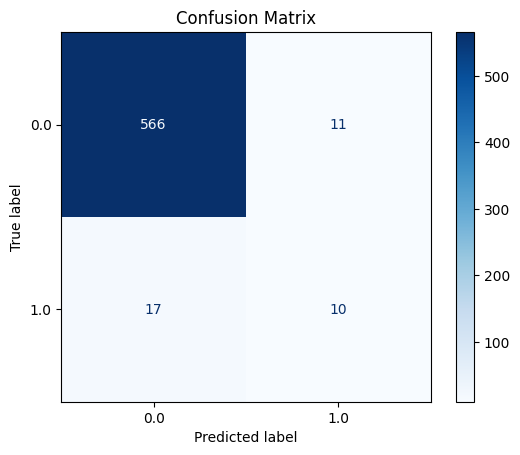

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       577
         1.0       0.48      0.37      0.42        27

    accuracy                           0.95       604
   macro avg       0.72      0.68      0.70       604
weighted avg       0.95      0.95      0.95       604

ROC AUC Score: 0.642210668207202


In [26]:
df = df_train_bidder.drop(['encoded_bidder_id'],axis=1,inplace=False)
decision_tree_for_feature_importances(df)

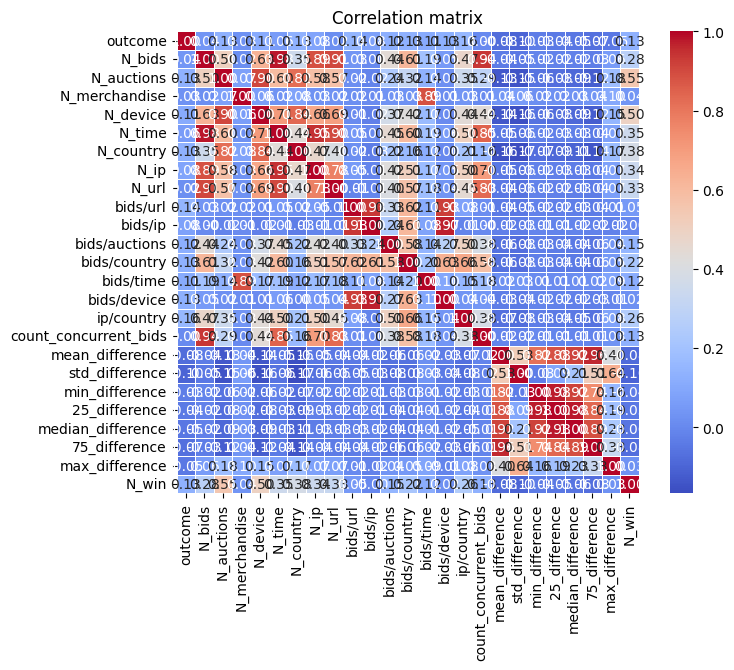

In [27]:
correlation_matrix(df)

Let's try to compute the activity of each bidder in the second half of each auction

In [28]:
temp_df = bids.sort_values(['auction', 'time'])
temp_df = temp_df.drop(['bid_id','merchandise','device','country','ip','url'],axis=1, inplace=False)

In [29]:
auct_duration = bids.sort_values(['auction', 'time'])[['encoded_bidder_id', 'auction', 'time']]
auct_duration = auct_duration[['auction', 'time']].groupby('auction').quantile(0.75).reset_index()
auct_duration.rename(columns={'time': 'q75'}, inplace=True)

In [30]:
temp_df = temp_df.merge(auct_duration, on='auction')
temp_df.fillna(0)
bidder_q75_counts = temp_df.groupby('encoded_bidder_id').apply(lambda x: (x['time'] > x['q75']).sum()).reset_index(name='q75_bid_count')
df_train_bidder = pd.merge(df_train_bidder, bidder_q75_counts, on='encoded_bidder_id', how='left').fillna(0)

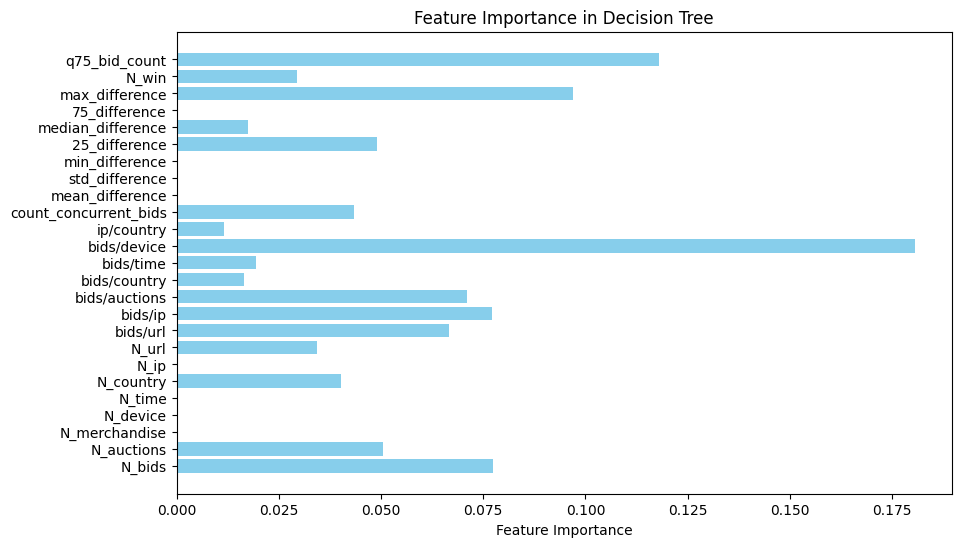

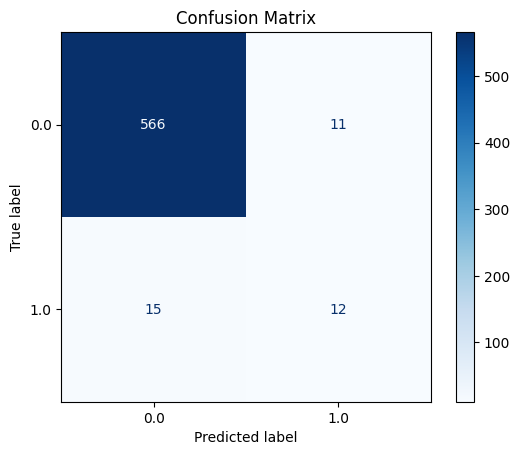

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       577
         1.0       0.52      0.44      0.48        27

    accuracy                           0.96       604
   macro avg       0.75      0.71      0.73       604
weighted avg       0.95      0.96      0.96       604

ROC AUC Score: 0.7216124269850439


In [31]:
df = df_train_bidder.drop(['encoded_bidder_id'],axis=1,inplace=False)
#f2 = df.drop(['std_difference', 'bids/time', 'mean_difference' ],axis=1,inplace=False)

decision_tree_for_feature_importances(df)

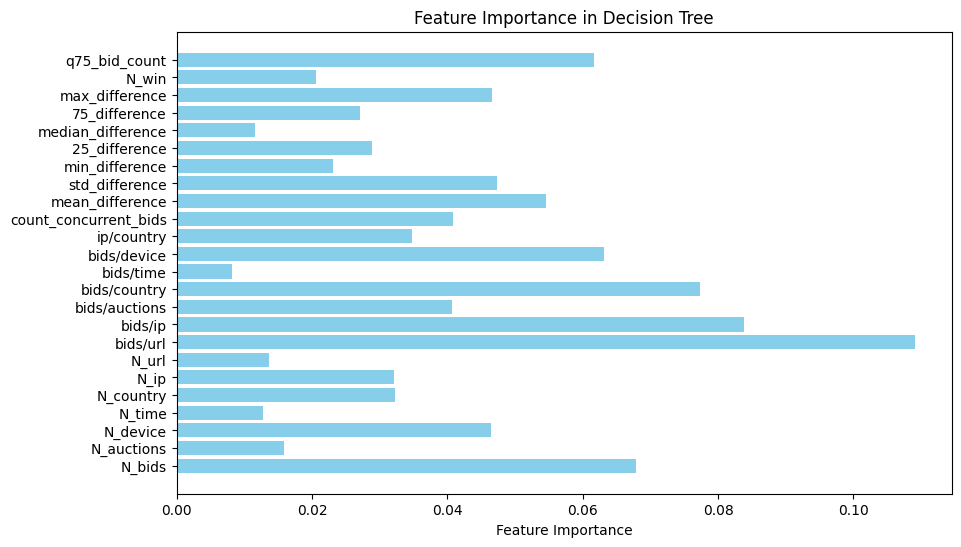

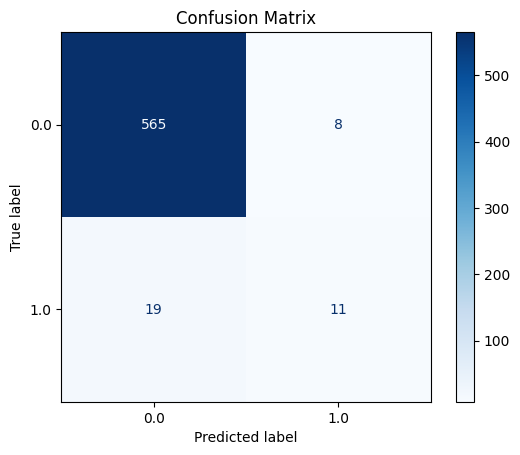

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       573
         1.0       0.58      0.37      0.45        30

    accuracy                           0.96       603
   macro avg       0.77      0.68      0.71       603
weighted avg       0.95      0.96      0.95       603

ROC AUC Score: 0.8265561372891216


In [108]:
df = df_train_bidder.drop(['encoded_bidder_id'],axis=1,inplace=False)
df = df.drop([615, 775, 392, 1669, 1102], axis = 0, inplace=False)
df2 = df.drop(['N_merchandise'],axis=1,inplace=False)
random_forest(df2)